<a href="https://colab.research.google.com/github/nixmaverick1997/EnsembleMethods/blob/main/EnsembleMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Activity 1

In [2]:
def visualize(X,y):
    # When the label y is 0, the class is represented with a blue square.
  # When the label y is 1, the class is represented with a green triangle.
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")

  # X contains two features, x1 and x2
  plt.xlabel(r"$x_1$", fontsize=20)
  plt.ylabel(r"$x_2$", fontsize=20)

  # Simplifying the plot by removing the axis scales.
  plt.xticks([])
  plt.yticks([])

  # Displaying the plot.
  
  return plt.show()

In [3]:
from sklearn.model_selection import train_test_split

def preprocess(X,y):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
  return X_train,X_test,y_train,y_test

In [4]:
from sklearn.datasets import make_moons

def create_dataset(n): 
  X,y=make_moons(n_samples=1500, noise=n, random_state=42)
  return X,y

noises=[0.04,0.1,0.2]
x_n=[]
y_n=[]

for noise in noises:
  X,y=create_dataset(noise)
  x_n.append(X)
  y_n.append(y)


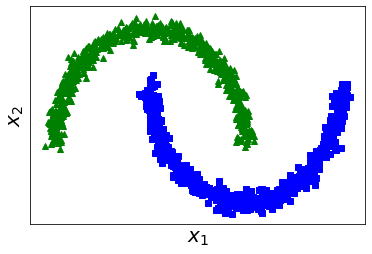

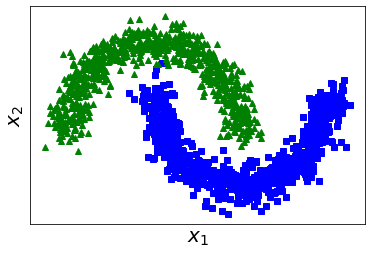

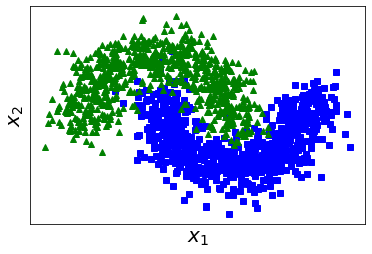

In [5]:
for i in range(3):
  visualize(x_n[i],y_n[i])

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

def train_on_rf(X,y):
  model=RandomForestClassifier()
  X_train,X_test,y_train,y_test=preprocess(X,y)
  model.fit(X_train, y_train)
  return model.score(X_test,y_test)

def train_on_gbc(X,y):
  model=GradientBoostingClassifier()
  X_train,X_test,y_train,y_test=preprocess(X,y)
  model.fit(X_train, y_train)
  return model.score(X_test,y_test)

def train_on_dt(X,y):
  model=DecisionTreeClassifier()
  X_train,X_test,y_train,y_test=preprocess(X,y)
  model.fit(X_train, y_train)
  return model.score(X_test,y_test)

Text(0.5, 1.0, 'Robustness of Ensemble Models')

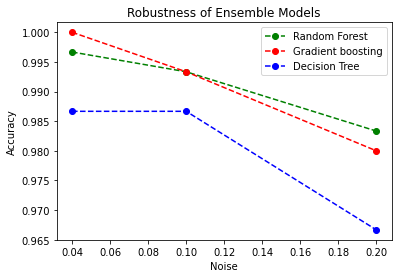

In [10]:
#training all the model on the all the possible noise values
scores_rf=[]
scores_gbc=[]
scores_dt=[]

for i in range(3):
  scores_rf.append(train_on_rf(x_n[i],y_n[i]))
  scores_gbc.append(train_on_gbc(x_n[i],y_n[i]))
  scores_dt.append(train_on_dt(x_n[i],y_n[i]))

plt.plot(noises, scores_rf, "o--", color="g", label="Random Forest")
plt.plot(noises, scores_gbc, "o--", color="r", label="Gradient boosting")
plt.plot(noises, scores_dt, "o--", color="b", label="Decision Tree")
plt.legend(loc="upper right")
plt.xlabel("Noise")
plt.ylabel("Accuracy")
plt.title("Robustness of Ensemble Models")

As seen in the above diagram, **decision tree classifier** suffers the *worst* among all the models, with increase in dataset noise. Random forest and gradient boosting classfiers prove to be robust in noisy datasets. But **Random Forest** has the *best* uniform performance across all noise levels.

# Activity 2